# Square-Octagon lattice

In [4]:
include("../functions.jl")
include("../plotting_functions.jl")
using LaTeXStrings
using JLD
using DataStructures
using LinearAlgebra
using Statistics
import Random
using ProgressMeter

In [5]:
# Problematic Ns are 9, 12, 8,6, 5, 4

In [6]:
# @show N = 4*12 + 1 # This is what we used for the paper and I have the cluster data saved
@show N = 4*12 + 1
if N%4 != 1
    error("N must be of the form 4k+1")
end

so_lat_full = get_so_lat(N, cell, oct)
so_lat_spin_full, latA, latB, sub_lat, G_to_spin, spin_to_G = get_so_lat_spin(so_lat_full)
# covering = get_perfect_covering(latA, latB,sub_lat, so_lat_full.nbr )
# config = convering_to_config(covering, so_lat_spin_full, G_to_spin);
println("Lattice size: ", so_lat_full.n)

so_lat = Graph(so_lat_full.pts, fill(0,1,1), Vector{Vector{Int64}}[], so_lat_full.n, so_lat_full.sq_plaq, so_lat_full.oct_plaq,Vector{Vector{Int64}}[] )
so_lat_spin = Graph(so_lat_spin_full.pts, fill(0,1,1), Vector{Vector{Int64}}[], so_lat_spin_full.n, so_lat_spin_full.sq_plaq, so_lat_spin_full.oct_plaq,Vector{Vector{Int64}}[] )
config_vert = ordered_state(so_lat_spin, N, "vert")
config_hori = ordered_state(so_lat_spin, N, "hori");
save("../data/fortress/lattice-data-$N.jld","so_lat", so_lat,
     "so_lat_spin", so_lat_spin,
     "config_vert", config_vert, "config_hori", config_hori)

noct_plaq = size(so_lat_spin_full.oct_plaq)[2]
nsq_plaq = size(so_lat_spin_full.sq_plaq)[2]
noct_plaq_pred = (N-1)^2
nsq_plaq_pred = (N-1)^2 + 1
if noct_plaq != noct_plaq_pred
    error("Number of octagonal plaquettes does not match prediction: $noct_plaq != $noct_plaq_pred")
end
if nsq_plaq != nsq_plaq_pred
    error("Number of square plaquettes does not match prediction: $nsq_plaq != $nsq_plaq_pred")
end


N = 4 * 12 + 1 = 49
  0.762240 seconds (9.97 M allocations: 290.521 MiB, 8.56% gc time, 17.01% compilation time)
  0.121778 seconds (711.42 k allocations: 323.036 MiB, 16.65% gc time, 40.98% compilation time)
  0.237851 seconds (19.01 k allocations: 1.254 MiB)
Lattice size: 9504


In [10]:
# load config
# config = load("./data/fortress/initial-config-$N.jld", "config")
config = load("../data/fortress/initial-config-$N-100.jld", "config")
# This configuration was run for 1000_000_000*50 * 100 steps = 5e12 steps
;

In [11]:
function plot_config(p, config,spin_to_G, so_lat, annotate = false)
    for i in 1:length(config)
        if config[i] == true
            a, b = spin_to_G[i]
            p1, p2 = so_lat.pts[a], so_lat.pts[b] 
            x, y = real.([p1,p2]) ,  imag.([p1, p2])
            plot!(p,x, y , linecolor="teal", linewidth=2)
        end
    end
    if annotate
        scatter!(p, real(pts), imag(pts), mc=:blue, markerstrokewidth=0, series_annotations = text.(1:npts))
    end
    return p
end

plot_config (generic function with 2 methods)

In [12]:
function bipartite_sublattices(adj::AbstractMatrix{Bool})
    n = size(adj, 1)
    color = fill(-1, n)  # -1: unvisited, 0: set A, 1: set B

    for start in 1:n
        if color[start] == -1
            queue = [start]
            color[start] = 0

            while !isempty(queue)
                u = popfirst!(queue)
                for v in 1:n
                    if adj[u, v]
                        if color[v] == -1
                            color[v] = 1 - color[u]
                            push!(queue, v)
                        elseif color[v] == color[u]
                            error("Graph is not bipartite")
                        end
                    end
                end
            end
        end
    end

    set_A = findall(x -> x == 0, color)
    set_B = findall(x -> x == 1, color)
    return set_A, set_B
end

bipartite_sublattices (generic function with 1 method)

In [15]:
A, B = bipartite_sublattices(Matrix{Bool}(so_lat_full.adj))
println("Set A: ", A)
println("Set B: ", B)
sublattice = fill("", length(so_lat.pts))
for a in A
    sublattice[a] = "A"
end
for b in B
    sublattice[b] = "B"
end
if "" in sublattice
    error("Not all sites are assigned to a sublattice")
end

Set A: [1, 4, 6, 7, 11, 13, 14, 18, 20, 21, 25, 27, 28, 32, 34, 35, 39, 41, 42, 46, 48, 49, 53, 55, 56, 60, 62, 63, 67, 69, 70, 74, 76, 77, 81, 83, 84, 88, 90, 91, 95, 97, 98, 102, 104, 105, 109, 111, 112, 116, 118, 119, 123, 125, 126, 130, 132, 133, 137, 139, 140, 144, 146, 147, 151, 153, 154, 158, 160, 161, 165, 167, 168, 171, 173, 174, 176, 179, 181, 182, 184, 187, 189, 190, 192, 195, 197, 198, 200, 203, 205, 206, 208, 211, 213, 214, 216, 219, 221, 222, 224, 227, 229, 230, 232, 235, 237, 238, 240, 243, 245, 246, 248, 251, 253, 254, 256, 259, 261, 262, 264, 267, 269, 270, 272, 275, 277, 278, 280, 283, 285, 286, 288, 291, 293, 294, 296, 299, 301, 302, 304, 307, 309, 310, 312, 315, 317, 318, 320, 323, 325, 326, 328, 331, 333, 334, 336, 339, 341, 342, 344, 347, 349, 350, 352, 355, 357, 358, 360, 363, 365, 366, 367, 370, 372, 373, 375, 378, 380, 381, 383, 386, 388, 389, 391, 394, 396, 397, 399, 402, 404, 405, 407, 410, 412, 413, 415, 418, 420, 421, 423, 426, 428, 429, 431, 434, 436, 437,

In [16]:
function plot_config_4color2(p, config,spin_to_G, so_lat, A, B, sublattice)
    cols = ["red", "blue", "green", "orange", "gray"]
    cols = ["red", "blue", "green", "orange", "gold","purple","orangered","turquoise"]
    # cols = ["red", "blue", "green", "orange", "khaki","plum","salmon","darkturquoise"]
    cols = ["green","orange","red","blue","plum","khaki","darkturquoise","salmon"]
    blk = "grey0"
    cols = ["limegreen","darkgoldenrod1","lightsalmon1","steelblue1",blk, blk, blk, blk]
    # Fucntion to assign colors based on the orientation
    # cols[1] for vertical dimers of the form AB
    # cols[2] for vertical dimers of the form BA
    # cols[3] for horizontal dimers of the form AB
    # cols[4] for horizontal dimers of the form BA

    for i in 1:length(config)
        if config[i] == true
            a, b = spin_to_G[i]
            p1, p2 = so_lat.pts[a], so_lat.pts[b] 
            color = "black" # default color
            # Determine the orientation of the dimer
            if abs( real(p1-p2) ) < 1e-5
                # vertical dimers
                top, bottom = a, b
                if imag(p1) < imag(p2)
                    top, bottom = b, a
                end
                # Check the sublattice of the dimer
                if sublattice[top] == "A" && sublattice[bottom] == "B"
                    color = cols[1]
                elseif sublattice[top] == "B" && sublattice[bottom] == "A"
                    color = cols[3]
                end
            
            elseif abs( imag(p1-p2) ) < 1e-5

                left, right = a, b
                if real(p1) > real(p2)
                    left, right = b, a
                end
                if sublattice[left] == "A" && sublattice[right] == "B"
                    color = cols[4]
                elseif sublattice[left] == "B" && sublattice[right] == "A"
                    color = cols[2]
                end
            else
                # diagonal dimers
                # Check the sublattice of the dimer
                indA, indB = 0, 0
                if sublattice[a] == "A" && sublattice[b] == "B"
                    indA, indB = a, b
                elseif sublattice[a] == "B" && sublattice[b] == "A"
                    indA, indB = b, a
                else
                    error("Dimer does not belong to the bipartite lattice")
                end
                pA, pB = so_lat.pts[indA], so_lat.pts[indB]
                angle = (imag(pA-pB) * real(pA-pB) > 0) ? "45" : "135"
                if angle == "45" 
                    if real(pA) < real(pB) 
                        color = cols[5]
                    elseif real(pA) > real(pB)
                            color = cols[6]
                    end
                elseif angle == "135"
                    if real(pA) < real(pB)
                        color = cols[7]
                    elseif real(pA) > real(pB)
                        color = cols[8]
                    end
                end
            end
            x, y = real.([p1,p2]) ,  imag.([p1, p2])
            plot!(p,x, y , linecolor=color, linewidth=4.5)
        end
    end
    return p
end

plot_config_4color2 (generic function with 1 method)

In [17]:
p = plot_generate(800)
# plot_graph(p,so_lattice, "pink",  2, :green)
@time plot_edges(p,so_lat_full, "pink", 1.5)
# plot_edges(p,so_lat_spin,"green")
@time plot_config_4color2(p, config,spin_to_G, so_lat, A, B, sublattice)
# plot!(xticks=false, yticks=false, framestyle=:none)
# display(p)
;

 19.709394 seconds (2.50 M allocations: 142.374 MiB, 0.59% gc time, 1.19% compilation time: 11% of which was recompilation)
 24.790913 seconds (1.86 M allocations: 106.500 MiB, 0.43% compilation time)


In [18]:
η = maximum(real.(so_lat_spin.pts)) / 2 - 0.5 / 2
println("CHECK THIS ADDITIONAL 0.5 / 2")
x_list = y_list = range(-2η, stop=2η, length=700) # -2*η:0.01:2*η

Z = [ 400 * (x/η)^8 + 400 * (y/η)^8 + 3400 * (x/η)^2 * (y/η)^6 + 3400 * (y/η)^2 * (x/η)^6 + 8025 * (x/η)^4 * (y/η)^4 + 1000 * (x/η)^6 + 1000 * (y/η)^6 - 17250 * (x/η)^4 * (y/η)^2 - 17250 * (x/η)^2 * (y/η)^4 - 1431 * (x/η)^4 - 1431 * (y/η)^4 + 25812 * (x/η)^2 * (y/η)^2 - 3402 * (x/η)^2 - 3402 * (y/η)^2 + 729 for x in x_list, y in y_list]

lc = :purple
contour!(p,x_list, y_list, Z, levels=[0], aspect_ratio=:equal, linecolor=lc, linewidth=3)
Z_lat = [abs(x) + abs(y) - 2η for x in x_list, y in y_list]
contour!(p,x_list, y_list, Z_lat, levels=[0], aspect_ratio=:equal, linecolor=lc, linewidth=3)
plot!(grid=false, ticks=false, framestyle=:none)
;

CHECK THIS ADDITIONAL 0.5 / 2


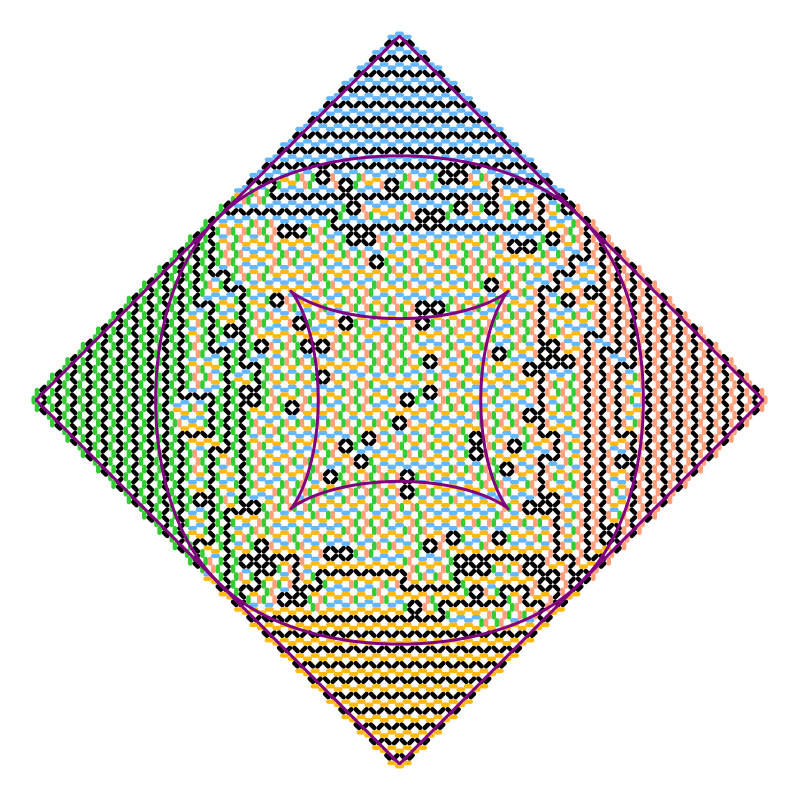

In [20]:
savefig(p, "../images/fortress-random-config.pdf")
display(p)